<img src="https://whatcar.vn/media/2018/09/car-lot-940x470.jpg"/>

## Прогнозирование стоимости автомобиля по характеристикам


Собираем данные путем парсинга через авто ру


In [5]:
"""
from bs4 import BeautifulSoup    
import requests as r
import time 
import json
import pandas as pd

START_URL='https://auto.ru/moskva/cars/used/'

pages_url_list=[]
for i in range(1,100):   
    response = r.get( START_URL+'?page=%s'%i)
    page = BeautifulSoup(response.text, 'html.parser')
    print(i)
    for link in page.findAll('a',{"class": "Link OfferThumb"}):
        try:
            if link['href'] not in pages_url_list: 
                pages_url_list.append(link['href'])
        except:
            pass
print(len(pages_url_list))   
time.sleep(10)

cars_list = []
i = 0
for item in pages_url_list:
    response = r.get(item)
    response.encoding = 'utf8'
    page = BeautifulSoup(response.text, 'html.parser')
    if page.find('div', class_='CardSold') == None:
        try:
            json_data = json.loads(
                page.find('script', type="application/ld+json").string)
        except:
            print(item)
            pass
        cls_str = 'CardInfoRow_'
        span_str = 'CardInfoRow__cell'
        try:
            cars_list.append({
            'bodyType': json_data['bodyType'],
            'brand': json_data['brand'],
            'car_url': json_data['offers']['url'],
            'color': json_data['color'],
            'description': json_data['description'],
            'engineDisplacement': json_data['vehicleEngine']['engineDisplacement'],
            'enginePower': json_data['vehicleEngine']['enginePower'],
            'fuelType': json_data['fuelType'],
            'image': json_data['image'],
            'mileage': page.find(
                'li', class_=cls_str+'kmAge').find_all('span')[1].text,
            'modelDate': json_data['modelDate'],
            'model_name': json_data['name'],
            'name': json_data['vehicleEngine']['name'],
            'numberOfDoors': json_data['numberOfDoors'],
            'parsing_unixtime': int(time.time()),
            'priceCurrency': json_data['offers']['priceCurrency'],
            'productionDate': json_data['productionDate'],
            'sell_id': page.find(
                'div', title='Идентификатор объявления').text,
            'vehicleConfiguration': json_data['vehicleConfiguration'],
            'vehicleTransmission': json_data['vehicleTransmission'],
            'Владельцы': page.find(
                'li', class_=cls_str+'ownersCount').find_all('span')[1].text,
            'ПТС': page.find(
                'li', class_=cls_str+'pts').find_all('span')[1].text,
            'Привод': page.find(
                'li', class_=cls_str+'drive').find_all('span')[1].text,
            'Руль': page.find(
                'li', class_=cls_str+'wheel').find_all('span')[1].text,
            'Состояние': page.find(
                'li', class_=cls_str+'state').find_all('span')[1].text,
            'Таможня': page.find(
                'li', class_=cls_str+'customs').find_all('span')[1].text,
            'price': page.find(
                'span', class_='OfferPriceCaption__price').text
            })
        except:
            print(item)
            pass
    i +=1
    print(i)    
    time.sleep(0.1)
    
df = pd.DataFrame(cars_list)
"""

'\nfrom bs4 import BeautifulSoup    \nimport requests as r\nimport time \nimport json\nimport pandas as pd\n\nSTART_URL=\'https://auto.ru/moskva/cars/used/\'\n\npages_url_list=[]\nfor i in range(1,100):   \n    response = r.get( START_URL+\'?page=%s\'%i)\n    page = BeautifulSoup(response.text, \'html.parser\')\n    print(i)\n    for link in page.findAll(\'a\',{"class": "Link OfferThumb"}):\n        try:\n            if link[\'href\'] not in pages_url_list: \n                pages_url_list.append(link[\'href\'])\n        except:\n            pass\nprint(len(pages_url_list))   \ntime.sleep(10)\n\ncars_list = []\ni = 0\nfor item in pages_url_list:\n    response = r.get(item)\n    response.encoding = \'utf8\'\n    page = BeautifulSoup(response.text, \'html.parser\')\n    if page.find(\'div\', class_=\'CardSold\') == None:\n        try:\n            json_data = json.loads(\n                page.find(\'script\', type="application/ld+json").string)\n        except:\n            print(item)\n

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from bs4 import BeautifulSoup    
import requests as r
import time 
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from tqdm import tqdm
from datetime import timedelta, datetime, date
import pandas_profiling
from catboost import CatBoostRegressor
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.model_selection import RandomizedSearchCV

pd.options.mode.chained_assignment = None
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import StackingRegressor

from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

from tqdm import tqdm
from datetime import timedelta, datetime, date

import os

from pandas import Series
import re


In [7]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)

Python       : 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
Numpy        : 1.18.5


In [8]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [9]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [10]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

# Setup

In [11]:
VERSION    = 16
DIR_TRAIN  = '../input/all-auto-msk/' # подключил к ноутбуку внешний датасет
DIR_TEST   = '../input/sf-dst-car-price-prediction/'
VAL_SIZE   = 0.20   # 20%

# Data

In [12]:
!ls '../input'

all-auto-msk			       sf-dst-car-price-prediction
parsing-all-moscow-auto-ru-09-09-2020


In [13]:
train = pd.read_csv('../input/all-auto-msk/parsing') # датасет для обучения модели
test = pd.read_csv(DIR_TEST+'test.csv')
sample_submission = pd.read_csv(DIR_TEST+'sample_submission.csv')

In [14]:
sample_submission.shape

(34686, 2)

In [15]:
test.shape

(34686, 32)

In [16]:
train.head(5)

,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,fuelType,image,mileage,...,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,price
0,компактвэн,OPEL,https://auto.ru/cars/used/sale/opel/zafira/110...,синий,Машина в хорошем состоянии. 1 владелец. Стоит ...,1.8 LTR,140 N12,бензин,https://autoru.naydex.net/PCPr8j626/16ca6dIPl/...,256 000 км,...,№ 1104158440,COMPACTVAN ROBOT 1.8,роботизированная,1 владелец,Оригинал,передний,Левый,Не требует ремонта,Растаможен,411 000 ₽
1,кабриолет,VOLVO,https://auto.ru/cars/used/sale/volvo/c70/11041...,красный,Авто в идеальном состоянии. \nВ САЛОНЫ на став...,2.5 LTR,230 N12,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,72 764 км,...,№ 1104164439,CABRIO AUTOMATIC 2.5,автоматическая,2 владельца,Оригинал,передний,Левый,Не требует ремонта,Растаможен,2 200 000 ₽
2,хэтчбек 5 дв.,PORSCHE,https://auto.ru/cars/used/sale/porsche/panamer...,синий,Порше Центр Москва - единственный дилер Porsch...,4.0 LTR,550 N12,бензин,https://autoru.naydex.net/PCPr8j626/16ca6dIPl/...,27 337 км,...,№ 1103631724,HATCHBACK_5_DOORS ROBOT 4.0,роботизированная,1 владелец,Оригинал,полный,Левый,Не требует ремонта,Растаможен,13 810 800 ₽
3,внедорожник 5 дв.,HYUNDAI,https://auto.ru/cars/used/sale/hyundai/palisad...,чёрный,Новый автомобиль в редкой комплектации с БЕНЗИ...,3.5 LTR,249 N12,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,35 км,...,№ 1103065627,ALLROAD_5_DOORS AUTOMATIC 3.5,автоматическая,1 владелец,Оригинал,полный,Левый,Не требует ремонта,Растаможен,4 500 000 ₽
4,седан,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/pass...,чёрный,Машина в отличном состоянии. Год 2015. На авто...,1.8 LTR,180 N12,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,91 000 км,...,№ 1104169006,SEDAN ROBOT 1.8,роботизированная,1 владелец,Оригинал,передний,Левый,Не требует ремонта,Растаможен,1 299 000 ₽


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              3250 non-null   object
 1   brand                 3250 non-null   object
 2   car_url               3250 non-null   object
 3   color                 3250 non-null   object
 4   description           3250 non-null   object
 5   engineDisplacement    3250 non-null   object
 6   enginePower           3250 non-null   object
 7   fuelType              3250 non-null   object
 8   image                 3250 non-null   object
 9   mileage               3250 non-null   object
 10  modelDate             3250 non-null   int64 
 11  model_name            3250 non-null   object
 12  name                  3250 non-null   object
 13  numberOfDoors         3250 non-null   int64 
 14  parsing_unixtime      3250 non-null   int64 
 15  priceCurrency         3250 non-null   

In [18]:
test.head(5)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,...,LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,...,LIFTBACK ROBOT 1.8,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,"{""cruise-control"":true,""roller-blind-for-rear-...",бензин,...,LIFTBACK AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK AUTOMATIC 1.8,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

## Data Preprocessing

In [20]:
test

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,...,LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,...,LIFTBACK ROBOT 1.8,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,"{""cruise-control"":true,""roller-blind-for-rear-...",бензин,...,LIFTBACK AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK AUTOMATIC 1.8,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34681,седан,BMW,https://auto.ru/cars/used/sale/bmw/3er/1101369...,коричневый,NaN,Продается BMW 316i в отличном состоянии. Прода...,1.6 LTR,136 N12,"{""cruise-control"":true,""asr"":true,""tinted-glas...",бензин,...,SEDAN AUTOMATIC 1.6,автоматическая,EUROPEAN,3 или более,2 года и 1 месяц,Оригинал,задний,Левый,Не требует ремонта,Растаможен
34682,седан,BMW,https://auto.ru/cars/used/sale/bmw/5er/1101369...,чёрный,NaN,Продаётся отличный автомобиль.,2.0 LTR,190 N12,NaN,дизель,...,SEDAN AUTOMATIC 2.0,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен
34683,седан,BMW,https://auto.ru/cars/used/sale/bmw/5er/1101364...,серый,NaN,Хорошее состояние,2.5 LTR,170 N12,NaN,бензин,...,SEDAN AUTOMATIC 2.5,автоматическая,EUROPEAN,3 или более,NaN,Дубликат,задний,Левый,Не требует ремонта,Растаможен
34684,внедорожник 5 дв.,BMW,https://auto.ru/cars/used/sale/bmw/x1/11013625...,коричневый,"{""id"":""6336008"",""name"":""xDrive20d Локальная сб...",Автомобиль в идеальном состоянии . Куплен новы...,2.0 LTR,184 N12,"{""engine-proof"":true,""esp"":true,""start-stop-fu...",дизель,...,ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,EUROPEAN,2 владельца,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

In [22]:
# для baseline просто возьму пару схожих признаков без полной обработки
columns = ['bodyType', 'brand', 'car_url', 'color','description', 'engineDisplacement',
'enginePower', 'fuelType', 'image', 'mileage', 'modelDate',   'model_name', 'name',
'numberOfDoors', 'parsing_unixtime',  'priceCurrency', 'productionDate', 'sell_id',
'vehicleConfiguration', 'vehicleTransmission', 'Владельцы', 'ПТС', 'Привод','Руль',
'Состояние', 'Таможня', 'price']        
test['price'] = 0
test = test[columns]

In [23]:
test.shape

(34686, 27)

In [24]:
df_test = test[columns]
df_train = train[columns]

In [25]:
df_train.shape

(3250, 27)

In [26]:
df_test.shape

(34686, 27)

## Label Encoding

In [27]:
#дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [28]:
data.head(5)

,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,fuelType,image,mileage,...,vehicleConfiguration,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,price,sample
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,74000,...,LIFTBACK ROBOT 1.2,роботизированная,3 или более,Оригинал,передний,Левый,Не требует ремонта,Растаможен,0,0
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,60563,...,LIFTBACK MECHANICAL 1.6,механическая,1 владелец,Оригинал,передний,Левый,Не требует ремонта,Растаможен,0,0
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,88000,...,LIFTBACK ROBOT 1.8,роботизированная,1 владелец,Оригинал,передний,Левый,Не требует ремонта,Растаможен,0,0
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,95000,...,LIFTBACK AUTOMATIC 1.6,автоматическая,1 владелец,Оригинал,передний,Левый,Не требует ремонта,Растаможен,0,0
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,58536,...,LIFTBACK AUTOMATIC 1.8,автоматическая,1 владелец,Оригинал,передний,Левый,Не требует ремонта,Растаможен,0,0


наименование полей:
* body_type - тип кузова,
* brand - марка автомобиля,
* color - цвет автомобиля,
* description - описание в объявлении,
* engine_displacement - объём двигателя,
* engine_power - мощность двигателя,
* fuel_type - тип топлива,
* mileage - пробег,
* model_date - дата релиза модели,
* model_name - наименование модели,
* name
* number_of_doors - количество дверей,
* vehicle_configuration - конфигурация транспортного средства (ТС),
* parsing_unixtime - время парсинга данных, не предоставляет ценность,  
* 'priceCurrency',
* productionDate - дата производства автомобиля,
* 'sell_id',
* 'vehicleTransmission', 
* 'Владельцы',
* 'ПТС', 
* 'Привод',
* 'Руль',
* 'Состояние', 
* 'Таможня', 
* 'price'
* sample - индикатор принадлежности данных к тесту (0) и трейну (1),
* production_date 






In [29]:
#удаляем дубликаты
data = data.drop_duplicates()

In [30]:
data.describe()

,modelDate,numberOfDoors,parsing_unixtime,productionDate,sample
count,37936.000000,37936.000000,3.793600e+04,37936.000000,37936.000000
mean,2007.477357,4.467234,1.605320e+09,2009.665463,0.085671
std,7.358769,0.696510,6.644565e+06,6.985744,0.279881
min,1904.000000,0.000000,1.603107e+09,1904.000000,0.000000
25%,2004.000000,4.000000,1.603224e+09,2006.000000,0.000000
50%,2009.000000,5.000000,1.603263e+09,2011.000000,0.000000
75%,2013.000000,5.000000,1.603299e+09,2015.000000,0.000000
max,2020.000000,5.000000,1.627024e+09,2021.000000,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37936 entries, 0 to 37935
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              37936 non-null  object
 1   brand                 37936 non-null  object
 2   car_url               37936 non-null  object
 3   color                 37936 non-null  object
 4   description           37936 non-null  object
 5   engineDisplacement    37936 non-null  object
 6   enginePower           37936 non-null  object
 7   fuelType              37936 non-null  object
 8   image                 37936 non-null  object
 9   mileage               37936 non-null  object
 10  modelDate             37936 non-null  int64 
 11  model_name            37936 non-null  object
 12  name                  37936 non-null  object
 13  numberOfDoors         37936 non-null  int64 
 14  parsing_unixtime      37936 non-null  int64 
 15  priceCurrency         37936 non-null

In [32]:
pandas_profiling.ProfileReport(data)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


На основе ProfileReport можно сделать выводы:

* в датасете нет пустых срок
* категорий типа Numeric - 4, Categorical- 18, Boolean -1.
* enginePower, model_age, production_age имеет нормальное распредление, другие признаки типа Numeric таким не обладают
* признаки model date и  production date  имеют высокую корреляцию- скорее всего эти признаки мультиколлериарны
* mileage(пробег) зависит от возраста модели 

In [33]:
# числовые признаки
num_cols = []

# бинарные признаки
bin_cols = []

# категориальные признаки
cat_cols = []

# временные признаки
date_cols = []

# Body type 

In [34]:
data.bodyType.unique()

array(['лифтбек', 'внедорожник 5 дв.', 'хэтчбек 5 дв.', 'седан',
       'компактвэн', 'универсал 5 дв.', 'пикап одинарная кабина',
       'хэтчбек 3 дв.', 'купе', 'кабриолет', 'минивэн',
       'пикап двойная кабина', 'внедорожник 3 дв.', 'родстер', 'микровэн',
       'седан 2 дв.', 'купе-хардтоп', 'фастбек', 'тарга',
       'внедорожник открытый', 'лимузин', 'пикап полуторная кабина',
       'седан-хардтоп', 'фургон'], dtype=object)

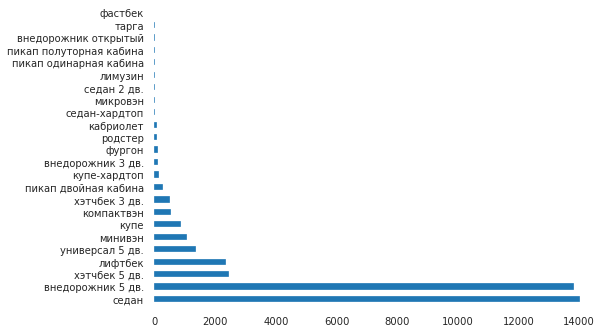

In [35]:
data['bodyType'].value_counts().plot.barh()

In [36]:
data['bodyType'] = data['bodyType'].astype('category').cat.codes
data['bodyType'].unique()

array([ 8,  1, 23, 15,  4, 19, 12, 22,  5,  3, 10, 11,  0, 14,  9, 16,  6,
       20, 18,  2,  7, 13, 17, 21], dtype=int8)

In [37]:
cat_cols.append('bodyType')

**Brand***

In [38]:
data['brand'].unique() 

array(['SKODA', 'AUDI', 'HONDA', 'VOLVO', 'BMW', 'NISSAN', 'INFINITI',
       'MERCEDES', 'TOYOTA', 'LEXUS', 'VOLKSWAGEN', 'MITSUBISHI', 'OPEL',
       'PORSCHE', 'HYUNDAI', 'VAZ', 'RENAULT', 'CHRYSLER', 'FORD',
       'LAND_ROVER', 'PEUGEOT', 'MASERATI', 'KIA', 'UAZ', 'SSANG_YONG',
       'CADILLAC', 'SUBARU', 'CHEVROLET', 'DAEWOO', 'MAZDA', 'MINI',
       'CITROEN', 'BENTLEY', 'GEELY', 'SUZUKI', 'LIFAN', 'GENESIS',
       'JEEP', 'FAW', 'CHERY', 'GREAT_WALL', 'CHANGAN', 'JAGUAR',
       'ROLLS_ROYCE', 'SAAB', 'ACURA', 'HAVAL', 'DODGE', 'FIAT', 'ISUZU',
       'IRAN_KHODRO', 'RAVON', 'IG', 'GAZ', 'TAGAZ', 'JAC', 'DONGFENG',
       'LAMBORGHINI', 'RINSPEED', 'VORTEX', 'SEAT', 'DATSUN', 'TESLA',
       'HUMMER'], dtype=object)

In [39]:
data['brand'].isnull().sum()

0

In [40]:
cat_cols.append('brand')

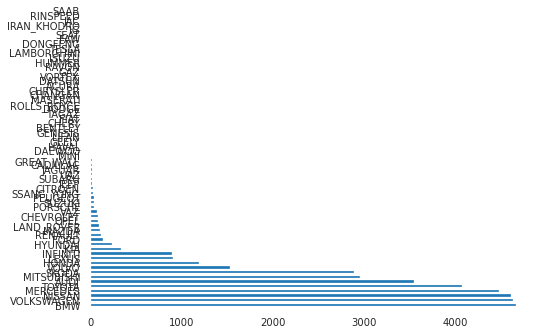

In [41]:
data['brand'].value_counts().plot.barh()

In [42]:
data['brand'] = data['brand'].astype('category').cat.codes
data['brand'].unique()

array([52,  1, 22, 62,  3, 42, 26, 39, 58, 35, 61, 41, 43, 45, 24, 60, 47,
        8, 16, 34, 44, 37, 32, 59, 53,  4, 54,  7, 10, 38, 40,  9,  2, 18,
       55, 36, 19, 31, 14,  6, 20,  5, 30, 49, 50,  0, 21, 12, 15, 28, 27,
       46, 25, 17, 56, 29, 13, 33, 48, 63, 51, 11, 57, 23], dtype=int8)

Наиболее популярные бренды-мерседес, БМВ, фольцваген


# car_url

неиформативное поле, исключим его из датафрейма

# **color**

In [43]:
data['color'].unique() 

array(['синий', 'чёрный', 'серый', 'коричневый', 'белый', 'пурпурный',
       'бежевый', 'серебристый', 'красный', 'зелёный', 'жёлтый',
       'голубой', 'оранжевый', 'фиолетовый', 'золотистый', 'розовый'],
      dtype=object)

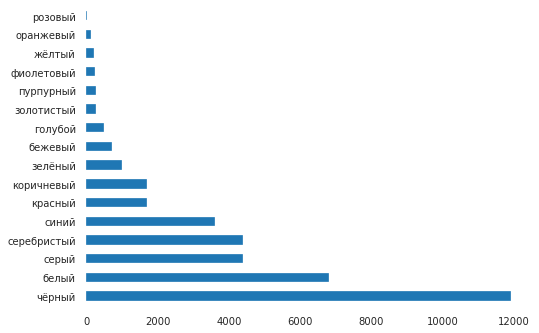

In [44]:
data['color'].value_counts().plot.barh()

машины преимущественно черного или белого цвета

In [45]:
data['color'].isnull().sum()

0

In [46]:
data['color'] = data['color'].astype('category').cat.codes
data['color'].unique()

array([13, 15, 12,  6,  1,  9,  0, 11,  7,  4,  3,  2,  8, 14,  5, 10],
      dtype=int8)

In [47]:
cat_cols.append('color')

# **description**

In [48]:
data.description.iloc[1]

'ЛОТ: 01217195\nАвтопрага Север\nДанный автомобиль прошел диагностику по 147 пунктам и имеет сертификат технической гарантии.\n\n\nВы можете получить скидку на данный автомобиль до 50000 рублей. Подробности уточняйте у менеджеров отдела продаж.\n\nГК FAVORIT MOTORS строит свою работу на принципах открытости и честности! Нам доверяют более 25 лет.\n\n- Автомобиль продается официальным дилером FAVORIT MOTORS.\n- Покупка и обслуживание у официального дилера.\n- Проведена предпродажная подготовка,\n- Гарантия юридической чистоты.\n- Круглосуточная техническая поддержка с бесплатным эвакуатором.\n\n- Автомобиль можно приобрести за наличный расчет, безналичным платежом, а также мы примем вашу машину по рыночной стоимости в рамках программы трейд-ин и при необходимости — выплатим за нее кредит.\n\n- Возможна покупка в кредит: специальные предложения по кредитованию и страхованию.\n- Оформление кредита по двум документам.\n- КАСКО не обязательно.\n\nПриглашаем на бесплатный тест-драйв!\n\nГруп

In [49]:
data['description'].isnull().sum()

0

In [50]:
#создадим новый признак: длинна описания
data['description_len'] = data['description'].apply(lambda x: len(x))
data['description_len'].mean()

715.209431674399

In [51]:
data['description_len'].max()

28789

In [52]:
data['description_len'].min()

1

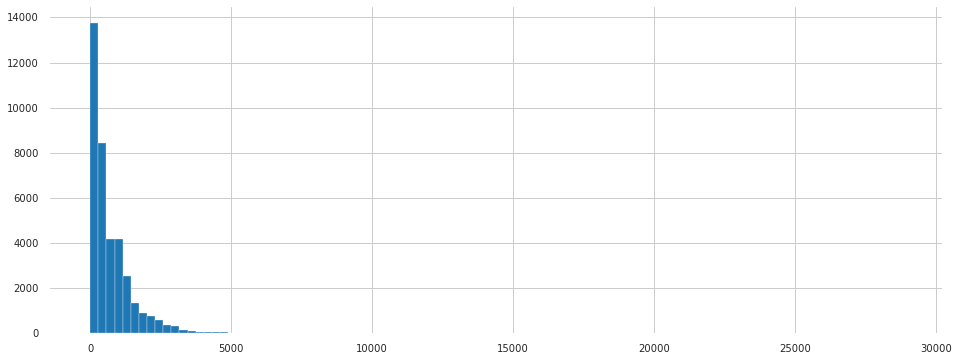

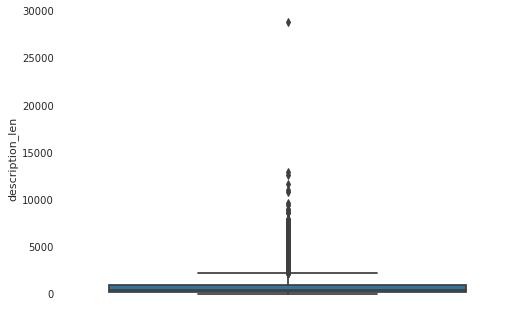

In [53]:
#посмотрим на распределение длинны описания ,видим что есть максимально длинные описания,
#выглядят как выбросы, но пока рано говорить об этом, попозже посмотрим значимость данного
# показателя

plt.figure(figsize=(16,6))
data['description_len'].hist(bins = 100)
plt.show()
sns.boxplot(y = data['description_len'],data=data)
plt.show()

In [54]:
num_cols.append('description_len')

# **engineDisplacement**

In [55]:
data['engineDisplacement'].unique() 

array(['1.2 LTR', '1.6 LTR', '1.8 LTR', '2.0 LTR', '1.4 LTR', '1.3 LTR',
       '1.0 LTR', '3.6 LTR', '1.5 LTR', '1.9 LTR', '2.8 LTR', '1.1 LTR',
       '2.5 LTR', '4.2 LTR', '3.0 LTR', '4.0 LTR', '5.9 LTR', '2.7 LTR',
       '3.1 LTR', '2.4 LTR', '5.2 LTR', '3.2 LTR', '4.1 LTR', '6.3 LTR',
       '2.3 LTR', '6.0 LTR', '2.2 LTR', '3.7 LTR', '2.9 LTR', '5.0 LTR',
       '3.3 LTR', '2.1 LTR', '2.6 LTR', ' LTR', '3.5 LTR', '1.7 LTR',
       '0.7 LTR', '4.4 LTR', '4.8 LTR', '5.4 LTR', '6.6 LTR', '4.9 LTR',
       '3.8 LTR', '3.4 LTR', '3.9 LTR', '4.6 LTR', '5.6 LTR', '4.5 LTR',
       '5.5 LTR', '6.2 LTR', '4.7 LTR', '4.3 LTR', '5.8 LTR', '5.3 LTR',
       '5.7 LTR', '6.8 LTR', '6.4 LTR', '0.8 LTR'], dtype=object)

In [56]:
data['engine_Displacement'] = [x.replace('LTR', '').replace(' ', '') for x in data['engineDisplacement']]
data['engine_Displacement'].unique() 

array(['1.2', '1.6', '1.8', '2.0', '1.4', '1.3', '1.0', '3.6', '1.5',
       '1.9', '2.8', '1.1', '2.5', '4.2', '3.0', '4.0', '5.9', '2.7',
       '3.1', '2.4', '5.2', '3.2', '4.1', '6.3', '2.3', '6.0', '2.2',
       '3.7', '2.9', '5.0', '3.3', '2.1', '2.6', '', '3.5', '1.7', '0.7',
       '4.4', '4.8', '5.4', '6.6', '4.9', '3.8', '3.4', '3.9', '4.6',
       '5.6', '4.5', '5.5', '6.2', '4.7', '4.3', '5.8', '5.3', '5.7',
       '6.8', '6.4', '0.8'], dtype=object)

In [57]:
data['engine_Displacement'] = data['engine_Displacement'].astype(str).apply(lambda x: 0 if x =='' else x)
data['engine_Displacement'] =data['engine_Displacement'].astype(float)
data['engine_Displacement'].unique() 

array([1.2, 1.6, 1.8, 2. , 1.4, 1.3, 1. , 3.6, 1.5, 1.9, 2.8, 1.1, 2.5,
       4.2, 3. , 4. , 5.9, 2.7, 3.1, 2.4, 5.2, 3.2, 4.1, 6.3, 2.3, 6. ,
       2.2, 3.7, 2.9, 5. , 3.3, 2.1, 2.6, 0. , 3.5, 1.7, 0.7, 4.4, 4.8,
       5.4, 6.6, 4.9, 3.8, 3.4, 3.9, 4.6, 5.6, 4.5, 5.5, 6.2, 4.7, 4.3,
       5.8, 5.3, 5.7, 6.8, 6.4, 0.8])

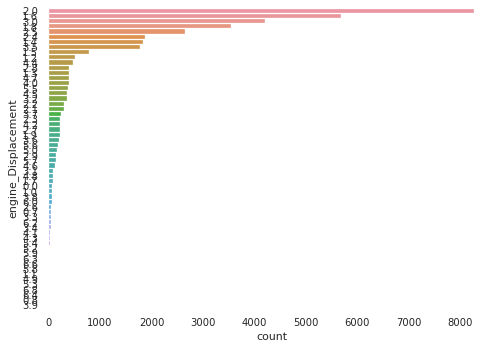

In [58]:
sns.countplot(y = data['engine_Displacement'], data = data,order = data['engine_Displacement'].value_counts().index)

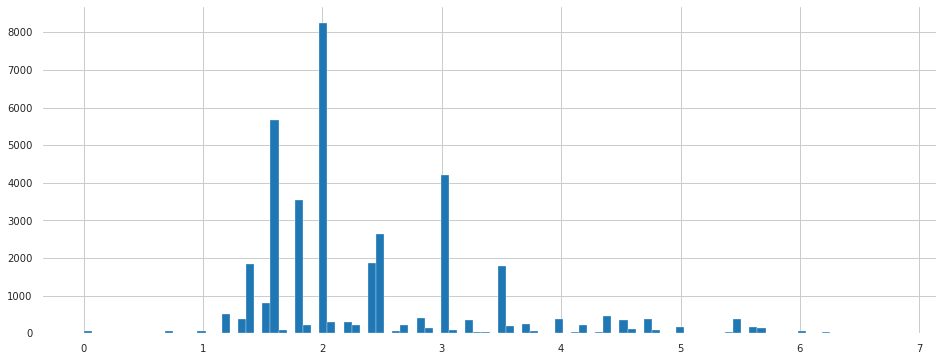

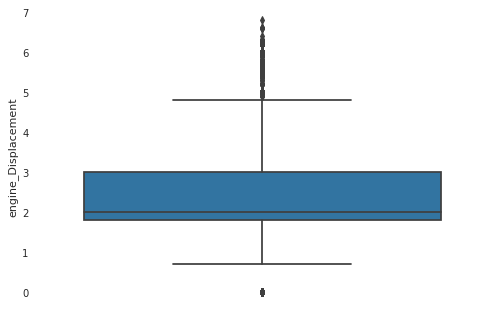

In [59]:
plt.figure(figsize=(16,6))
data['engine_Displacement'].hist(bins = 100)
plt.show()
sns.boxplot(y = data['engine_Displacement'],data=data)
plt.show()

In [60]:
num_cols.append('engine_Displacement')

# **enginePower**

In [61]:
#мощность двигателя, уберем повторяющееся значение
data['enginePower'].unique() 

array(['105 N12', '110 N12', '152 N12', '200 N12', '102 N12', '150 N12',
       '90 N12', '180 N12', '220 N12', '122 N12', '70 N12', '140 N12',
       '125 N12', '54 N12', '86 N12', '75 N12', '64 N12', '95 N12',
       '260 N12', '170 N12', '80 N12', '68 N12', '160 N12', '115 N12',
       '280 N12', '53 N12', '60 N12', '143 N12', '42 N12', '101 N12',
       '58 N12', '193 N12', '79 N12', '30 N12', '100 N12', '50 N12',
       '163 N12', '225 N12', '420 N12', '211 N12', '245 N12', '560 N12',
       '500 N12', '249 N12', '450 N12', '605 N12', '250 N12', '354 N12',
       '120 N12', '290 N12', '230 N12', '350 N12', '204 N12', '255 N12',
       '340 N12', '177 N12', '272 N12', '372 N12', '210 N12', '130 N12',
       '300 N12', '190 N12', '239 N12', '435 N12', '333 N12', '271 N12',
       '326 N12', '238 N12', '310 N12', '233 N12', '252 N12', '133 N12',
       '460 N12', '520 N12', '400 N12', '525 N12', '367 N12', '265 N12',
       '550 N12', '580 N12', '88 N12', '165 N12', '430 N12', '335 N

In [62]:
data['enginePower'] = [x.replace('N12', '').replace(' ', '') for x in data['enginePower']]
data['enginePower'] =data['enginePower'].astype(int)
data['enginePower'].unique() 

array([105, 110, 152, 200, 102, 150,  90, 180, 220, 122,  70, 140, 125,
        54,  86,  75,  64,  95, 260, 170,  80,  68, 160, 115, 280,  53,
        60, 143,  42, 101,  58, 193,  79,  30, 100,  50, 163, 225, 420,
       211, 245, 560, 500, 249, 450, 605, 250, 354, 120, 290, 230, 350,
       204, 255, 340, 177, 272, 372, 210, 130, 300, 190, 239, 435, 333,
       271, 326, 238, 310, 233, 252, 133, 460, 520, 400, 525, 367, 265,
       550, 580,  88, 165, 430, 335, 174, 224, 136, 256, 338, 112, 218,
       360,  93, 182, 113, 240, 270, 137, 155,  61, 254, 116,  71, 285,
       408, 166, 156, 257, 201, 162, 194, 142, 154, 147, 281, 243, 118,
       128,  91,  83, 205, 247, 188, 295, 275,  78, 109,  94, 185, 258,
       145, 132, 135,  52,  66, 124,  98, 215, 158,  99, 103, 131, 126,
       235, 181, 315, 203, 231,  82, 304, 175, 320, 213, 144, 146, 151,
       111, 286, 306, 107, 184, 313, 264, 575, 407, 192, 129, 555, 625,
       329, 370, 381, 269, 600, 510, 544, 462, 355, 507, 609, 43

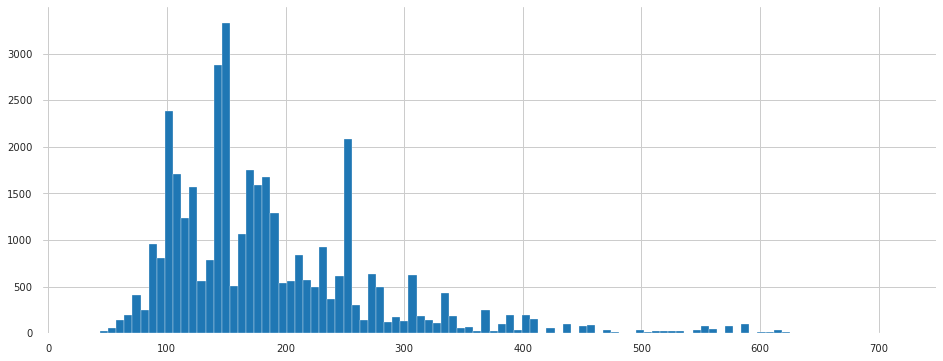

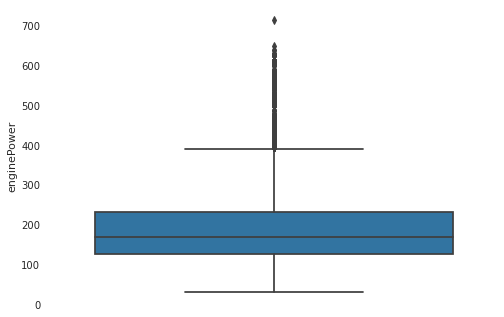

In [63]:
plt.figure(figsize=(16,6))
data['enginePower'].hist(bins = 100)
plt.show()
sns.boxplot(y = data['enginePower'],data=data)
plt.show()

In [64]:
num_cols.append('enginePower')

# **fuelType **

In [65]:
data.fuelType.unique()

array(['бензин', 'дизель', 'гибрид', 'электро', 'газ'], dtype=object)

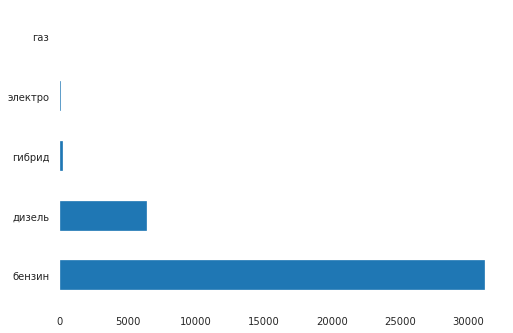

In [66]:
data['fuelType'].value_counts().plot.barh()

In [67]:
data['fuelType'].isnull().sum()

0

In [68]:
data['fuelType'] = data['fuelType'].astype('category').cat.codes
data['fuelType'].unique()

array([0, 3, 2, 4, 1], dtype=int8)

In [69]:
cat_cols.append('fuelType')

# image 

In [70]:
data.image.iloc[16] 
#не информативное поле

'https://avatars.mds.yandex.net/get-autoru-vos/2079505/0046b62bc0da3ee36a0733e9297f0778/320x240'

# **mileage**

In [71]:
data.mileage

0             74000
1             60563
2             88000
3             95000
4             58536
            ...    
37931     30 854 км
37932    156 268 км
37933    118 990 км
37934    212 711 км
37935     26 308 км
Name: mileage, Length: 37936, dtype: object

In [72]:
data['mileage'] = data['mileage'].astype(str)
data['mileage']= [x.replace('км', '').replace('\xa0', '').replace(' ', '') for x in data['mileage']]
data['mileage'] =data['mileage'].astype(int)
data['mileage'].unique() 

array([ 74000,  60563,  88000, ..., 118990, 212711,  26308])

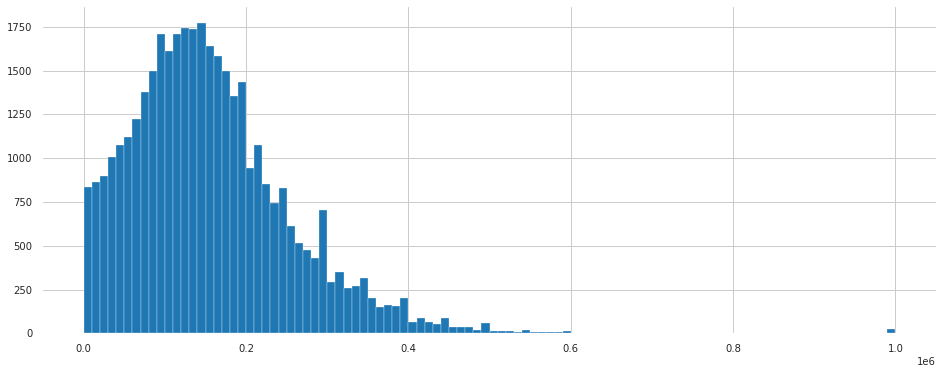

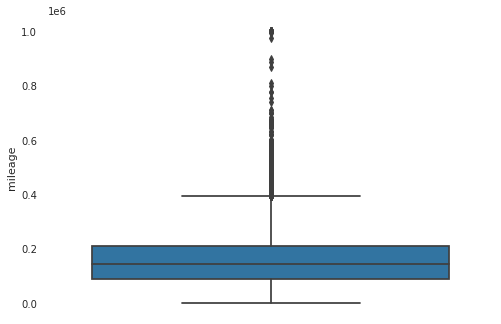

In [73]:
plt.figure(figsize=(16,6))
data['mileage'].hist(bins = 100)
plt.show()
sns.boxplot(y = data['mileage'],data=data)
plt.show()

In [74]:
num_cols.append('mileage')

# **modelDate**

In [75]:
data['modelDate'].value_counts()

2010    2775
2013    2526
2011    2421
2008    2368
2012    2315
        ... 
1973       1
1960       1
1904       1
1967       1
1963       1
Name: modelDate, Length: 67, dtype: int64

In [76]:
#добавим новый признак: дату модели
data['model_age'] = int(2021) - data['modelDate'].astype('int') # возраст модели 
data['model_age'] 

0         8
1         4
2         8
3         8
4        13
         ..
37931     3
37932     8
37933    12
37934     4
37935     3
Name: model_age, Length: 37936, dtype: int64

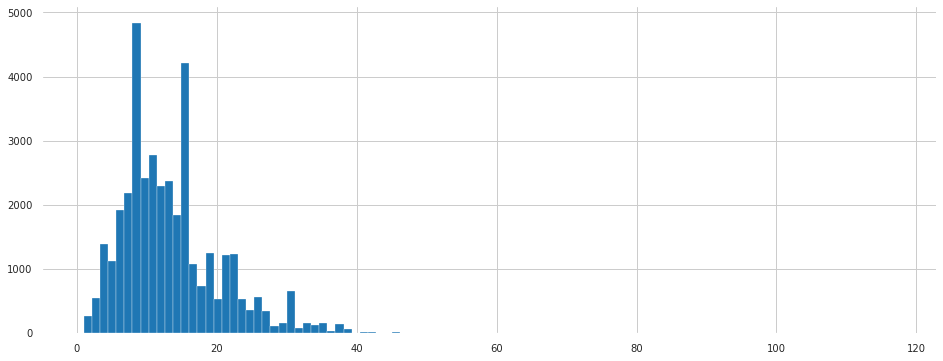

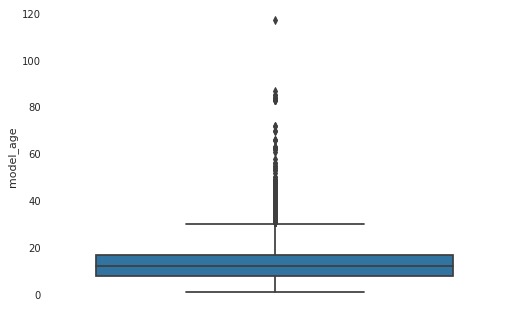

In [77]:
plt.figure(figsize=(16,6))
data['model_age'].hist(bins = 100)
plt.show()
sns.boxplot(y = data['model_age'],data=data)
plt.show()

In [78]:
num_cols.append('model_age')

In [79]:
date_cols.append('modelDate')

# **model_name**

In [80]:
data.model_name.unique()

array(['OCTAVIA', 'SUPERB', 'OCTAVIA_RS', ...,
       'BMW X3  30d xDrive II (F25)', 'Peugeot 3008 I Рестайлинг',
       'Cadillac SRX II'], dtype=object)

# name 

In [81]:
data['name'] = data['name'].astype(str)
# Создадим новый признак transmission на базе данных из name (используем regex):
data['transmission'] = data['name'].str.extract('([A][T]|[M][T]|[A][M][T]|[C][V][T])',
                                                expand=False).str.strip()
data['transmission'].value_counts()

AT     21575
MT      7816
CVT     4285
AMT     4260
Name: transmission, dtype: int64

In [82]:
data['transmission'] = data['transmission'].astype('category').cat.codes
data['transmission'].unique()

array([0, 3, 1, 2], dtype=int8)

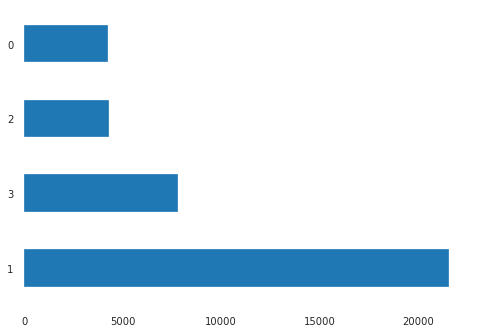

In [83]:
data['transmission'].value_counts().plot.barh()

In [84]:
cat_cols.append('transmission')

# **numberOfDoors **

In [85]:
data.numberOfDoors.unique()

array([5, 4, 2, 3, 0])

In [86]:
num_cols.append('numberOfDoors')

# **parsing_unixtime **

In [87]:
data.parsing_unixtime.unique()

array([1603226273, 1603226277, 1603226280, ..., 1627023986, 1627023988,
       1627023989])

# **priceCurrency**

In [88]:
data.priceCurrency.unique()

array(['RUB'], dtype=object)

данный показатель неинформативен

# **productionDate **

In [89]:
data.productionDate 

0        2014
1        2017
2        2014
3        2014
4        2012
         ... 
37931    2018
37932    2014
37933    2011
37934    2017
37935    2019
Name: productionDate, Length: 37936, dtype: int64

In [90]:
#добавим новый признак: дату производства
data['production_age'] = int(2021) - data['productionDate'].astype('int') # возраст модели 
data['production_age'] 

0         7
1         4
2         7
3         7
4         9
         ..
37931     3
37932     7
37933    10
37934     4
37935     2
Name: production_age, Length: 37936, dtype: int64

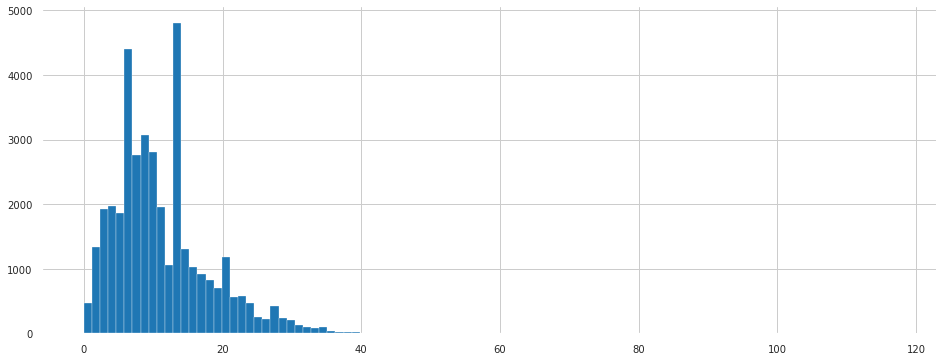

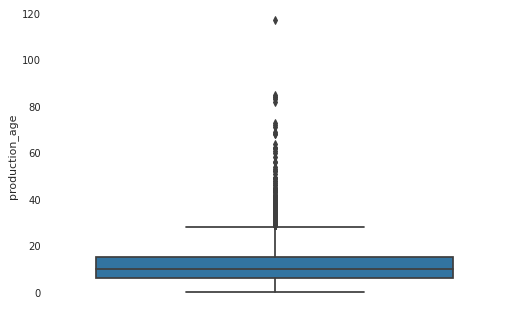

In [91]:
plt.figure(figsize=(16,6))
data['production_age'].hist(bins = 100)
plt.show()
sns.boxplot(y = data['production_age'],data=data)
plt.show()

In [92]:
num_cols.append('production_age')
date_cols.append('productionDate')

# **vehicleConfiguration**

In [93]:
data.vehicleConfiguration.unique()

array(['LIFTBACK ROBOT 1.2', 'LIFTBACK MECHANICAL 1.6',
       'LIFTBACK ROBOT 1.8', 'LIFTBACK AUTOMATIC 1.6',
       'LIFTBACK AUTOMATIC 1.8', 'LIFTBACK ROBOT 2.0',
       'ALLROAD_5_DOORS ROBOT 1.8', 'ALLROAD_5_DOORS MECHANICAL 1.4',
       'ALLROAD_5_DOORS MECHANICAL 1.8', 'LIFTBACK ROBOT 1.4',
       'ALLROAD_5_DOORS ROBOT 1.4', 'ALLROAD_5_DOORS ROBOT 2.0',
       'ALLROAD_5_DOORS MECHANICAL 1.2', 'LIFTBACK MECHANICAL 1.4',
       'HATCHBACK_5_DOORS AUTOMATIC 1.6',
       'HATCHBACK_5_DOORS MECHANICAL 1.2', 'ALLROAD_5_DOORS ROBOT 1.2',
       'SEDAN AUTOMATIC 1.8', 'COMPACTVAN AUTOMATIC 1.6',
       'WAGON_5_DOORS ROBOT 2.0', 'LIFTBACK MECHANICAL 1.8',
       'ALLROAD_5_DOORS AUTOMATIC 1.6', 'HATCHBACK_5_DOORS ROBOT 1.2',
       'WAGON_5_DOORS ROBOT 1.8', 'WAGON_5_DOORS AUTOMATIC 1.6',
       'HATCHBACK_5_DOORS MECHANICAL 1.3',
       'HATCHBACK_5_DOORS MECHANICAL 1.4', 'LIFTBACK MECHANICAL 1.2',
       'COMPACTVAN MECHANICAL 1.2', 'WAGON_5_DOORS MECHANICAL 1.2',
       'HATCHBACK_

In [94]:
data['vehicle_Configuration'] = data['vehicleConfiguration'].astype(str)
# Создадим новый признак transmission на базе данных из name (используем regex):
data['vehicle_Configuration'] = data['vehicle_Configuration'].str.extract('([M][E][C][H][A][N][I][C][A][L]|[A][U][T][O][M][A][T][I][C]|[R][O][B][O][T]|[V][A][R][I][A][T][O][R])',
                                                expand=False).str.strip()
data['vehicle_Configuration'].value_counts()

AUTOMATIC     21566
MECHANICAL     7825
VARIATOR       4285
ROBOT          4260
Name: vehicle_Configuration, dtype: int64

In [95]:
data['vehicle_Configuration'] = data['vehicle_Configuration'].astype('category').cat.codes
data['vehicle_Configuration'].unique()

array([2, 1, 0, 3], dtype=int8)

In [96]:
cat_cols.append('vehicle_Configuration')

In [97]:
data['Владельцы'].unique()

array(['3 или более', '1\xa0владелец', '2\xa0владельца'], dtype=object)

In [98]:
owners = {'1\xa0владелец': 1, '2\xa0владельца': 2, '3 или более': 3}
data['owners'] = data['Владельцы'].apply(owners.get)

In [99]:
data['owners'].unique()

array([3, 1, 2])

owners означает:

1 - у автомобиля был 1 владелец,
2 - было 2 владельца,
3 - было 3 и более владельцев.

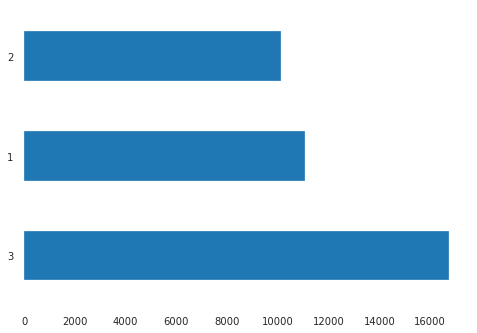

In [100]:
cat_cols.append('owners')
data['owners'].value_counts().plot.barh()

In [101]:
data['ПТС'].unique()

array(['Оригинал', 'Дубликат', nan], dtype=object)

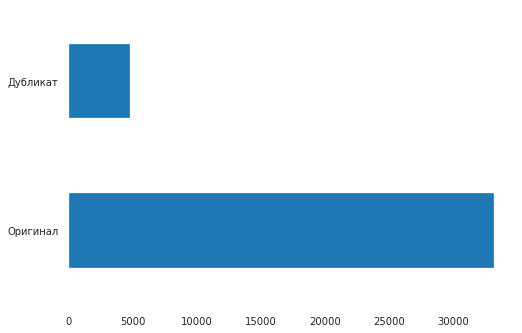

In [102]:
data['ПТС'].value_counts().plot.barh()

In [103]:
data['PTS'] = data['ПТС'].astype('category').cat.codes
data['PTS'].unique()

array([ 1,  0, -1], dtype=int8)

In [104]:
bin_cols.append('PTS')

In [105]:
data['Привод'].unique()

array(['передний', 'полный', 'задний'], dtype=object)

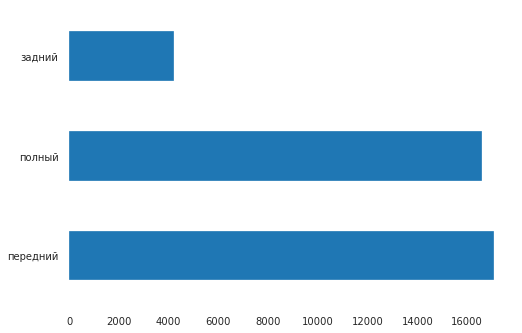

In [106]:
data['Привод'].value_counts().plot.barh()

In [107]:
data['gear'] = data['Привод'].astype('category').cat.codes
data['gear'].unique()


array([1, 2, 0], dtype=int8)

In [108]:
bin_cols.append('gear')

In [109]:
data['Руль'].unique()

array(['Левый', 'Правый'], dtype=object)

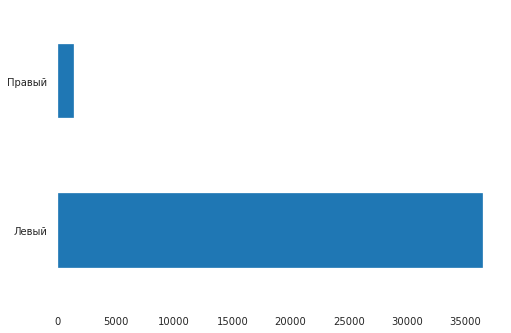

In [110]:
data['Руль'].value_counts().plot.barh()

In [111]:
data['steering_wheel'] = data['Руль'].astype('category').cat.codes
data['steering_wheel'].unique()
bin_cols.append('steering_wheel')

In [112]:
data['steering_wheel'].unique()

array([0, 1], dtype=int8)

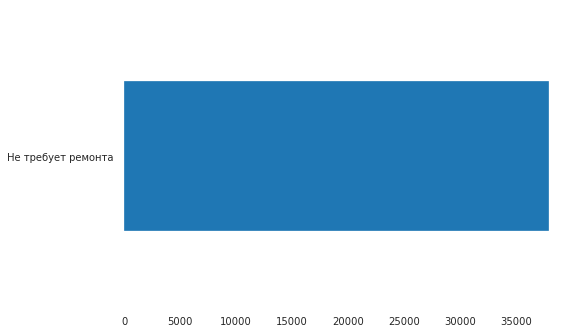

In [113]:
data['Состояние'].value_counts().plot.barh()

все машины из датасета не требуют ремонта, поэтому нет смысла включать данный признак в модель

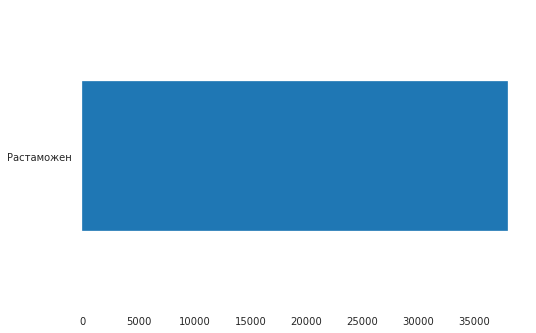

In [114]:
data['Таможня'].value_counts().plot.barh()

аналогично  для признака "таможня", все машины растаможены, нет смысла включать в модель данный признак

In [115]:
data['price']= data.price.astype(str)
data['price']= [x.replace('\xa0', '').replace('₽', '') for x in data.price]

In [116]:
data['price'] =data.price.astype(float)

In [117]:
data['price']

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
           ...    
37931    2860000.0
37932    2279000.0
37933     840000.0
37934     715000.0
37935     880000.0
Name: price, Length: 37936, dtype: float64

In [118]:
# числовые признаки
num_cols

['description_len',
 'engine_Displacement',
 'enginePower',
 'mileage',
 'model_age',
 'numberOfDoors',
 'production_age']

In [119]:
# бинарные признаки
bin_cols 

['PTS', 'gear', 'steering_wheel']

In [120]:
# категориальные признаки
cat_cols

['bodyType',
 'brand',
 'color',
 'fuelType',
 'transmission',
 'vehicle_Configuration',
 'owners']

In [121]:
# временные признаки
date_cols 

['modelDate', 'productionDate']

# **Correlation**

посмотрим корреляцию числовых признаков

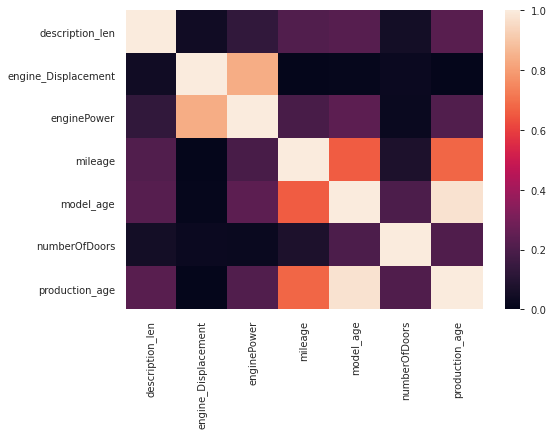

In [122]:
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

* наибольшая корреляция между возврастом производства машины и возврастом модели
* также наблюдается высокая корреляция между engine_displacement(объём двигателя) иb engine_power (мощность двигателя)
скорее всего эти признаки мультиколлениарны
при этом наблюдается корреляция между возврастом модели и пробегом

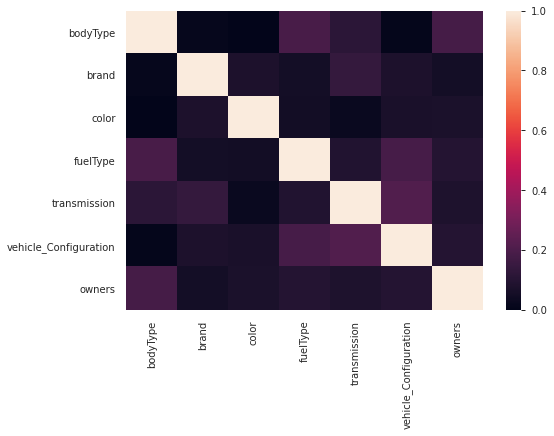

In [123]:
#посмотрим корреляцию категориальных признаков
sns.heatmap(data[cat_cols].corr().abs(), vmin=0, vmax=1)

среди категориальный признаков не наблюдается ярковыраженной зависимости

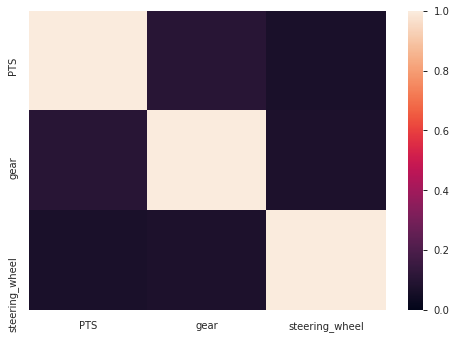

In [124]:
#посмотрим корреляцию бинарных признаков
sns.heatmap(data[bin_cols].corr().abs(), vmin=0, vmax=1)

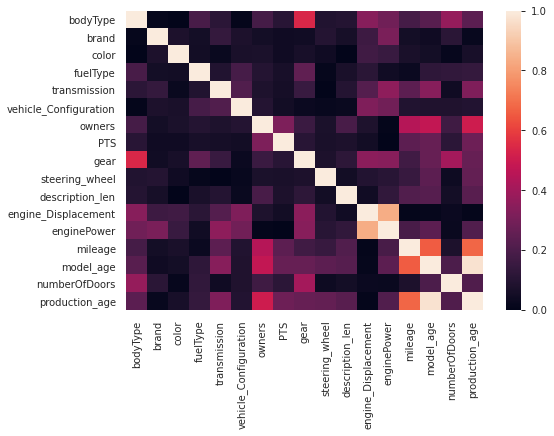

In [125]:
#посмотрим корреляцию всех признаков
sns.heatmap(data[cat_cols + bin_cols + num_cols].corr().abs(), vmin=0, vmax=1)

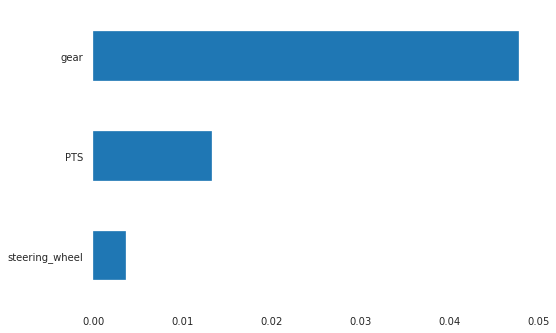

In [126]:
#определяем значимость бинарных  переменных:
imp_cat = Series(mutual_info_classif(data[bin_cols], 
                                     data['price'],
                                     discrete_features=True), index=bin_cols)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

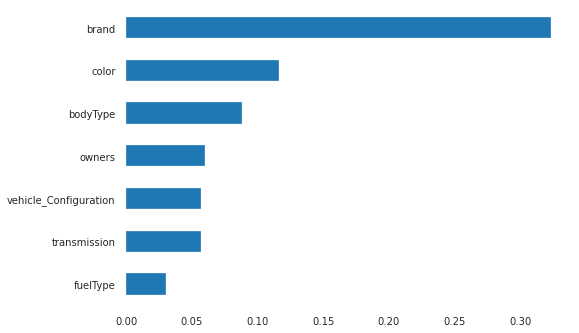

In [127]:
#определяем значимость категориальных  переменных:
imp_cat = Series(mutual_info_classif(data[cat_cols], 
                                     data['price'],
                                     discrete_features=True), index=cat_cols)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

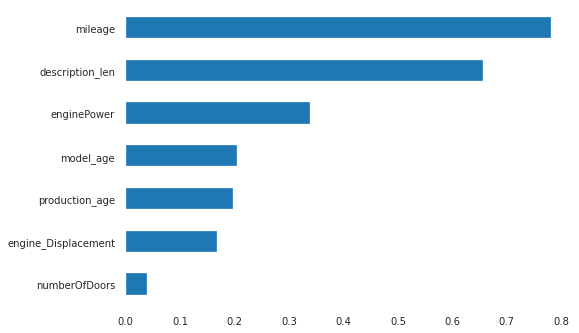

In [128]:
#определяем значимость числовых  переменных:
imp_cat = Series(mutual_info_classif(data[num_cols], 
                                     data['price'],
                                     discrete_features=True), index=num_cols)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

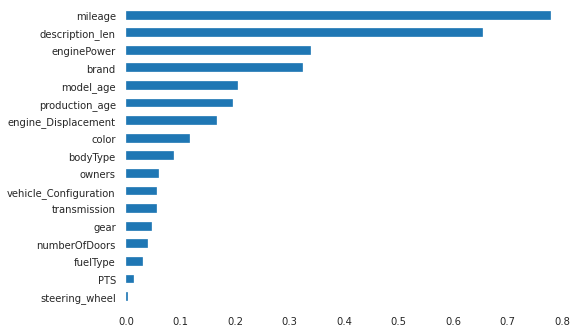

In [129]:
# Посмотрим значимость всех переменных на одном графике:
imp_cat = Series(mutual_info_classif(data[data['price'].isna() == False][cat_cols + num_cols + bin_cols], 
                                     data[data['price'].isna() == False]['price'],
                                     discrete_features = True), index = cat_cols + num_cols + bin_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

пробег - самый значимый признак, также размер описания машины является значимым признаком
наименее значимыц признак -это  сторона руля

In [130]:
imp_cat=data[cat_cols + num_cols + bin_cols]
imp_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37936 entries, 0 to 37935
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bodyType               37936 non-null  int8   
 1   brand                  37936 non-null  int8   
 2   color                  37936 non-null  int8   
 3   fuelType               37936 non-null  int8   
 4   transmission           37936 non-null  int8   
 5   vehicle_Configuration  37936 non-null  int8   
 6   owners                 37936 non-null  int64  
 7   description_len        37936 non-null  int64  
 8   engine_Displacement    37936 non-null  float64
 9   enginePower            37936 non-null  int64  
 10  mileage                37936 non-null  int64  
 11  model_age              37936 non-null  int64  
 12  numberOfDoors          37936 non-null  int64  
 13  production_age         37936 non-null  int64  
 14  PTS                    37936 non-null  int8   
 15  ge

In [131]:
data[data['price'].isna() == True]

,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,fuelType,image,mileage,...,description_len,engine_Displacement,model_age,transmission,production_age,vehicle_Configuration,owners,PTS,gear,steering_wheel


In [132]:
# Стандартизация числовых переменных
#X_num = StandardScaler().fit_transform(data[data['sample'] == 1][num_cols].values)
#X_num_test = StandardScaler().fit_transform(data[data['sample'] == 0][num_cols].values)

In [133]:
# снова разделим категориальные признаки  на тренировочный и тестовый наборы
#X_cat = data[data['sample'] == 1][cat_cols + bin_cols].values
#X_cat_test =data[data['sample'] == 0][cat_cols + bin_cols].values
#X = data.query('sample == 1').drop(['sample'], axis=1)
#X_sub = data.query('sample == 0').drop(['sample'], axis=1)
X = data[data['sample'] == 1][cat_cols + bin_cols + num_cols]
X_sub = data[data['sample'] == 0][cat_cols + bin_cols + num_cols]
Y = data[data['sample'] == 1]['price']

In [134]:
# Объединяем
#X = np.hstack([X_num, X_cat])
#Y = data[data['sample'] == 1]['price'].values

## Train Split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

# Model 1: Создадим "наивную" модель 
Эта модель будет предсказывать среднюю цену по модели двигателя (engineDisplacement). 
C ней будем сравнивать другие модели.




In [136]:
tmp_train = X_train.copy()
tmp_train['price'] = y_train

In [137]:
# Находим median по экземплярам engineDisplacement в трейне и размечаем тест
predict = X_test['engine_Displacement'].map(tmp_train.groupby('engine_Displacement')['price'].median())

#оцениваем точность
print(f"Точность наивной модели по метрике MAPE: {(mape(y_test, predict.values))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 62.69%


In [138]:
# Подготовим датафрейм, в который мы будем аккумулировать результаты по моделям,
# чтобы записывать результаты и сравнивать их в единой таблице.
df_cum = pd.DataFrame(columns=['MAPE','model'])
df_cum.info()
#Запишем эти данные в таблицу
def cumulated_res(data, model, mape):
    l = len(data)
    data.loc[l] = [mape, model]
    return data

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MAPE    0 non-null      object
 1   model   0 non-null      object
dtypes: object(2)
memory usage: 0.0+ bytes


In [139]:
df_cum = cumulated_res(df_cum, 'Наивная', (mape(y_test, predict.values))*100)
df_cum

,MAPE,model
0,62.686407,Наивная


# # Model 2 : CatBoost
![](https://pbs.twimg.com/media/DP-jUCyXcAArRTo.png:large)   


У нас в данных практически все признаки категориальные. Специально для работы с такими данными была создана очень удобная библиотека CatBoost от Яндекса. [https://catboost.ai](http://)     
На данный момент **CatBoost является одной из лучших библиотек для табличных данных!**

#### Полезные видео о CatBoost (на русском):
* [Доклад про CatBoost](https://youtu.be/9ZrfErvm97M)
* [Свежий Туториал от команды CatBoost (практическая часть)](https://youtu.be/wQt4kgAOgV0) 

## Fit

In [140]:
model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, y_train,
         #cat_features=cat_features_ids,
         eval_set=(X_test, y_test),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

model.save_model('catboost_single_model_baseline.model')

In [141]:
# оцениваем точность
predict = model.predict(X_test)
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict))*100:0.2f}%")

Точность модели по метрике MAPE: 13.96%


In [142]:
df_cum = cumulated_res(df_cum, 'CatBoost', mape(y_test, predict)*100)
df_cum

,MAPE,model
0,62.686407,Наивная
1,13.964895,CatBoost


Вот так просто со старта, даже не трогая сами данные и не подбирая настройки catboosta, получаем модель с уровнем ошибки в 14%!

### Log Traget
Попробуем взять таргет в логорифм - это позволит уменьшить влияние выбросов на обучение модели (используем для этого np.log и np.exp).    
В принциепе мы можем использовать любое приобразование на целевую переменную. Например деление на курс доллара, евро или гречки :) в дату сбора данных, смотрим дату парсинга в тесте в **parsing_unixtime**

In [143]:
np.log(y_train)

35480    16.167234
35356    13.498056
37698    14.770252
36521    12.144197
35874    15.551581
           ...    
35781    13.883169
35816    13.772603
35980    13.522481
35546    14.920767
37860    13.392391
Name: price, Length: 2600, dtype: float64

In [144]:
model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

model.save_model('catboost_single_model_2_baseline.model')

In [145]:
predict_test = np.exp(model.predict(X_test))
predict_submission = np.exp(model.predict(X_sub))

In [146]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 12.21%


Как видим точность возросла до 12%

In [147]:
df_cum = cumulated_res(df_cum, 'CatBoost логарифмованная', mape(y_test, predict_test)*100)
df_cum

,MAPE,model
0,62.686407,Наивная
1,13.964895,CatBoost
2,12.207603,CatBoost логарифмованная


# Model 2 : LinearRegression

In [148]:
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [149]:
print(f"Точность модели по метрике MAPE: {(mape(y_test, y_pred))*100:0.2f}%")

Точность модели по метрике MAPE: 70.71%


In [150]:
df_cum = cumulated_res(df_cum, 'LinearRegression',mape(y_test, y_pred)*100)
df_cum

,MAPE,model
0,62.686407,Наивная
1,13.964895,CatBoost
2,12.207603,CatBoost логарифмованная
3,70.713003,LinearRegression


# DecisionTreeRegressor

In [151]:
model_dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)
model_dtr.fit(X_train, np.log(y_train))

predict_test = np.exp(model_dtr.predict(X_test))
m = mape(y_test, predict_test)
print(f"Точность модели по метрике MAPE: {(m)*100:0.2f}%")

Точность модели по метрике MAPE: 23.48%


In [152]:
df_cum = cumulated_res(df_cum, 'DecisionTreeRegressor',m*100)
df_cum

,MAPE,model
0,62.686407,Наивная
1,13.964895,CatBoost
2,12.207603,CatBoost логарифмованная
3,70.713003,LinearRegression
4,23.478228,DecisionTreeRegressor


# RandomForestRegressor

In [153]:
model_rfr = RandomForestRegressor(150, random_state=RANDOM_SEED, verbose=True)
model_rfr.fit(X_train, np.log(y_train))

predict_test = np.exp(model_rfr.predict(X_test))
m = mape(y_test, predict_test)
print(f"Точность модели по метрике MAPE: {m}%")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Точность модели по метрике MAPE: 0.1566693869234376%


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [154]:
df_cum = cumulated_res(df_cum, 'RandomForest', m*100)
df_cum

,MAPE,model
0,62.686407,Наивная
1,13.964895,CatBoost
2,12.207603,CatBoost логарифмованная
3,70.713003,LinearRegression
4,23.478228,DecisionTreeRegressor
5,15.666939,RandomForest


# GradientBoosting

In [155]:
gb = GradientBoostingRegressor(min_samples_split=2, 
                               learning_rate=0.03, 
                               max_depth=10, 
                               n_estimators=1000)

In [156]:
start = datetime.now()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
m = mape(y_test, y_pred)
print(f"Точность модели по метрике MAPE: {m}%")

Точность модели по метрике MAPE: 0.15931985112711772%


In [157]:
df_cum = cumulated_res(df_cum, 'GradientBoosting', m*100)
df_cum

,MAPE,model
0,62.686407,Наивная
1,13.964895,CatBoost
2,12.207603,CatBoost логарифмованная
3,70.713003,LinearRegression
4,23.478228,DecisionTreeRegressor
5,15.666939,RandomForest
6,15.931985,GradientBoosting


# BaggingRegressor

In [158]:
model_br = BaggingRegressor(n_estimators=150,n_jobs=10, random_state=RANDOM_SEED)
model_br.fit(X_train, np.log(y_train))

predict_test = np.exp(model_br.predict(X_test))
m = mape(y_test, predict_test)
print(f"Точность модели по метрике MAPE: {m}%")

Точность модели по метрике MAPE: 0.15664347799166234%


In [159]:
df_cum = cumulated_res(df_cum, 'BaggingRegressor', m*100)
df_cum

,MAPE,model
0,62.686407,Наивная
1,13.964895,CatBoost
2,12.207603,CatBoost логарифмованная
3,70.713003,LinearRegression
4,23.478228,DecisionTreeRegressor
5,15.666939,RandomForest
6,15.931985,GradientBoosting
7,15.664348,BaggingRegressor


# AdaBoostRegressor

In [160]:
model_ab = AdaBoostRegressor(n_estimators=150,random_state =RANDOM_SEED)
model_ab.fit(X_train, np.log(y_train))

predict_test = np.exp(model_ab.predict(X_test))
m = mape(y_test, predict_test)
print(f"Точность модели по метрике MAPE: {m}%")

Точность модели по метрике MAPE: 0.2346012444208186%


In [161]:
df_cum = cumulated_res(df_cum, 'AdaBoost', m*100)
df_cum

,MAPE,model
0,62.686407,Наивная
1,13.964895,CatBoost
2,12.207603,CatBoost логарифмованная
3,70.713003,LinearRegression
4,23.478228,DecisionTreeRegressor
5,15.666939,RandomForest
6,15.931985,GradientBoosting
7,15.664348,BaggingRegressor
8,23.460124,AdaBoost


Отсортируем результаты по убыванию MAPE

In [162]:
df_cum.sort_values('MAPE', ascending=True)

,MAPE,model
2,12.207603,CatBoost логарифмованная
1,13.964895,CatBoost
7,15.664348,BaggingRegressor
5,15.666939,RandomForest
6,15.931985,GradientBoosting
8,23.460124,AdaBoost
4,23.478228,DecisionTreeRegressor
0,62.686407,Наивная
3,70.713003,LinearRegression


# Submission

In [163]:
predict_submission = np.exp(model.predict(X_sub))
len(predict_submission)

34686

In [164]:
sample_submission['price'] = predict_submission
sample_submission.to_csv('submission_bt.csv', index=False)
sample_submission.head(10)

,sell_id,price
0,1100575026,7.622117e+05
1,1100549428,9.400584e+05
2,1100658222,9.877410e+05
3,1100937408,7.232941e+05
4,1101037972,9.339632e+05
5,1100912634,7.701546e+05
6,1101228730,7.205045e+05
7,1100165896,4.063595e+05
8,1100768262,1.643354e+06
9,1101218501,9.951065e+05


# What's next?
Или что еще можно сделать, чтоб улучшить результат:

* Спарсить свежие данные 
* Посмотреть, что можно извлечь из признаков или как еще можно обработать признаки
* Сгенерировать новые признаки
* Попробовать подобрать параметры модели
* Попробовать другие алгоритмы и библиотеки ML
* Сделать Ансамбль моделей, Blending, Stacking

Подробный чек лист: https://docs.google.com/spreadsheets/d/1I_ErM3U0Cs7Rs1obyZbIEGtVn-H47pHNCi4xdDgUmXY/edit?usp=sharing